In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [4]:
df=pd.read_csv('Unemployment in India.csv')
print(df)

             Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   

# Nouvelle section

In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.shape

(768, 7)

In [8]:
#information of Datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
# Vérifier les valeurs manquantes
df.isnull().sum()

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna()


In [ ]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [10]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [11]:
print(df.head)


<bound method NDFrame.head of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86  

In [12]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [15]:
df.columns = df.columns.str.strip()



In [16]:
df.rename(columns={'incorrect_name': 'Date'}, inplace=True)



In [17]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-17-b9c6864122be>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [18]:
# Statistiques descriptives
print(df.describe())


                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

In [19]:
quantitative_cols = []
qualitative_cols = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        quantitative_cols.append(column)
    else:
        qualitative_cols.append(column)

print("\nQuantitative columns:")
print(quantitative_cols)

print("\nQualitative columns:")
print(qualitative_cols)


Quantitative columns:
['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

Qualitative columns:
['Region', 'Date', 'Frequency', 'Area']


In [21]:

# the measurement scale of each column
def get_measurement_scale(data):
    scale_dict = {}
    for column in data.columns:
        unique_values = data[column].nunique()
        total_values = data[column].count()
        if pd.api.types.is_numeric_dtype(data[column]):
            if unique_values == total_values:  # Ratio scale
                scale_dict[column] = "Ratio"
            else:  # Interval scale
                scale_dict[column] = "Interval"
        else:
            if unique_values == total_values:  # Nominal scale
                scale_dict[column] = "Nominal"
            else:  # Ordinal scale
                scale_dict[column] = "Ordinal"
    return scale_dict

# Get the measurement scale of each column
measurement_scale = get_measurement_scale(df)
# Display the measurement scale of each column
print("\nMeasurement scale of each column:")
for column, scale in measurement_scale.items():
    print("\n"f"{column}: {scale}")


Measurement scale of each column:

Region: Ordinal

Date: Ordinal

Frequency: Ordinal

Estimated Unemployment Rate (%): Interval

Estimated Employed: Ratio

Estimated Labour Participation Rate (%): Interval

Area: Ordinal


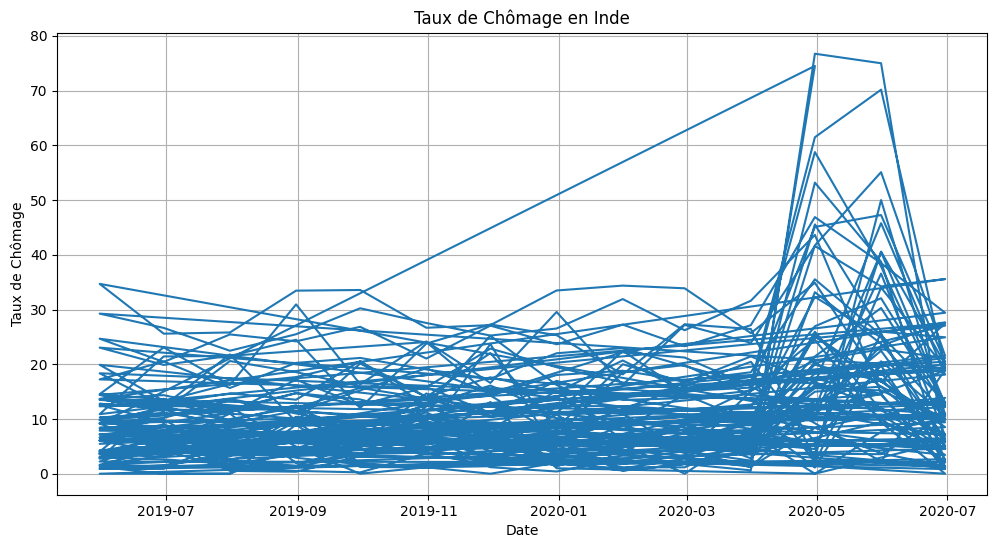

In [22]:
import matplotlib.pyplot as plt

# Tracer le taux de chômage au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.title('Taux de Chômage en Inde')
plt.xlabel('Date')
plt.ylabel('Taux de Chômage')
plt.grid(True)
plt.show()


In [23]:
# Statistiques descriptives
print(df.describe())

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

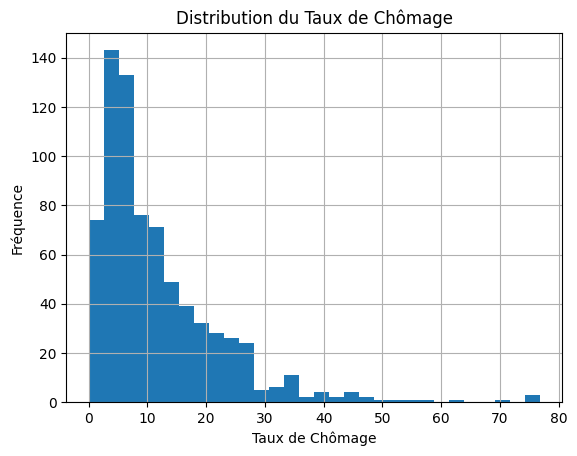

In [24]:
# Histogramme
df['Estimated Unemployment Rate (%)'].hist(bins=30)
plt.title('Distribution du Taux de Chômage')
plt.xlabel('Taux de Chômage')
plt.ylabel('Fréquence')
plt.show()


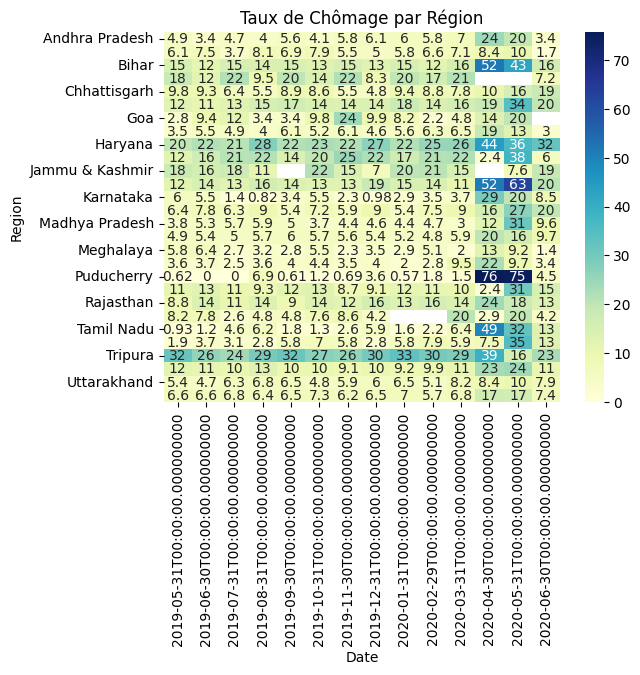

In [27]:
# Pivot des données
heatmap_data = df.pivot_table(index='Region', columns='Date', values='Estimated Unemployment Rate (%)')

# Créer une heatmap
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")

plt.title('Taux de Chômage par Région')
plt.show()


In [28]:
# Assurer une fréquence régulière des données, ajuster 'M' selon la fréquence de vos données
df = df.asfreq('M')
df = df.resample('M').mean()

In [29]:
df.set_index('Date', inplace=True)

# Réindexer avec une fréquence régulière mensuelle (si applicable)
df = df.asfreq('M')

# Vérifier le nombre d'observations
print(f"Nombre total d'observations : {df.shape[0]}")
print(df.head())

# Assurer qu'il y a suffisamment de données pour la décomposition
if df.shape[0] >= 24:  # Par exemple, pour period=12, au moins 24 observations sont nécessaires
    # Décomposer la série temporelle
    decomposition = seasonal_decompose(df['Estimated Unemployment Rate (%)'], model='additive', period=12)

    # Visualiser les résultats
    decomposition.plot()
    plt.show()
else:
    print("Pas assez de données pour effectuer la décomposition saisonnière.")


Nombre total d'observations : 0
Empty DataFrame
Columns: [Region, Frequency, Estimated Unemployment Rate (%), Estimated Employed, Estimated Labour Participation Rate (%), Area]
Index: []
Pas assez de données pour effectuer la décomposition saisonnière.


In [31]:
import plotly.express as px

newDF = df[['Estimated Unemployment Rate (%)', 'Region']]
newDF = newDF.groupby('Region').mean().reset_index()
newDF = newDF.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(newDF,
             x='Region',
             y='Estimated Unemployment Rate (%)',
             color='Region',
             title='Region-wise Average Unemployment Rate',
             labels={'Estimated Unemployment Rate (%)': 'Average Unemployment Rate (%)'},
             hover_name='Region',
             hover_data={'Estimated Unemployment Rate (%)': True},
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text='Estimated Unemployment Rate (%)'
             )

fig.update_layout(xaxis_title='Region', yaxis_title='Average Unemployment Rate (%)',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  )

fig.update_traces(textposition='outside')
fig.show()


In [36]:
# Plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wise
fig = px.bar(df,
             x='Region',
             y='Estimated Unemployment Rate (%)',  # Corrected 'y' parameter
             animation_frame='Frequency',
             color='Area',
             title='Region-wise Unemployment Rate',
             height=800)
if fig.layout.updatemenus:
  fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500



fig.show()

In [39]:
# Assuming df is your DataFrame with data grouped by Region and MonthName
df_grouped = df.groupby(['Region', 'Frequency'])['Estimated Unemployment Rate (%)'].mean().unstack()
if df_grouped.empty:
  print("the df is empty ")
else:
  df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
  plt.title('Monthly Unemployment Rate by Region')
  plt.xlabel('Month')
  plt.ylabel('Average Unemployment Rate (%)')
  plt.xticks(rotation=45)
  plt.legend(title='Region')
  plt.show()



the df is empty 


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Set style for seaborn
sns.set_style("whitegrid")


In [44]:
print(data.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [46]:
data.columns = data.columns.str.strip()

<ipython-input-47-f508523abe9a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




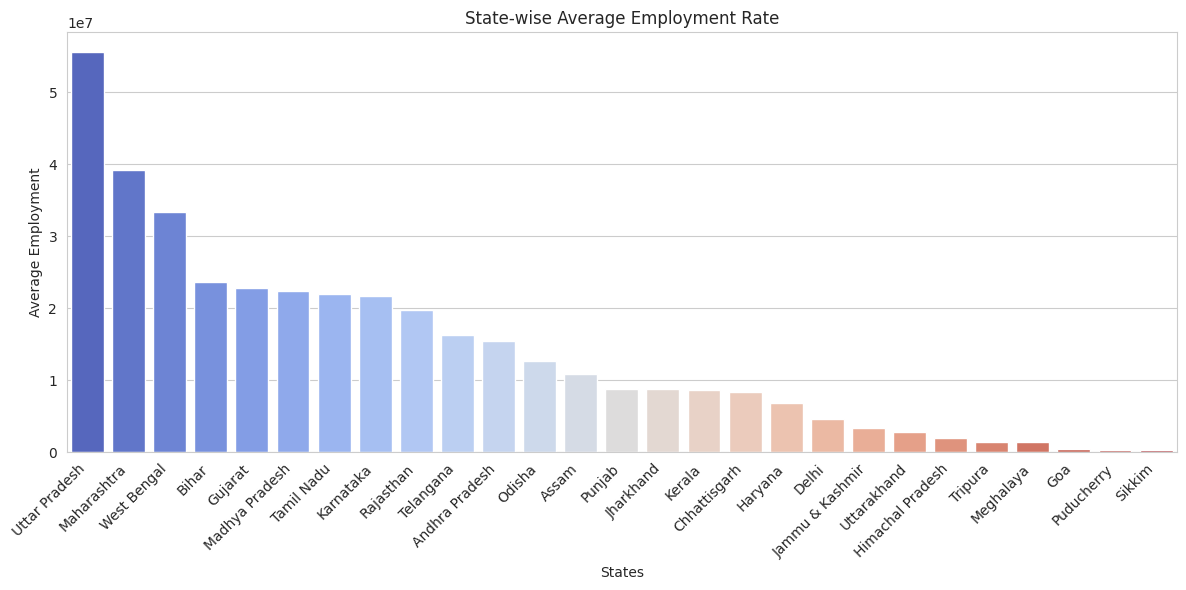

In [47]:
# 1. State-wise Average Employment Rate
state_avg_employment = data.groupby('Region')['Estimated Employed'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg_employment.index, y=state_avg_employment.values, palette='coolwarm')
plt.title('State-wise Average Employment Rate')
plt.xlabel('States')
plt.ylabel('Average Employment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-48-feb4a7f566cb>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




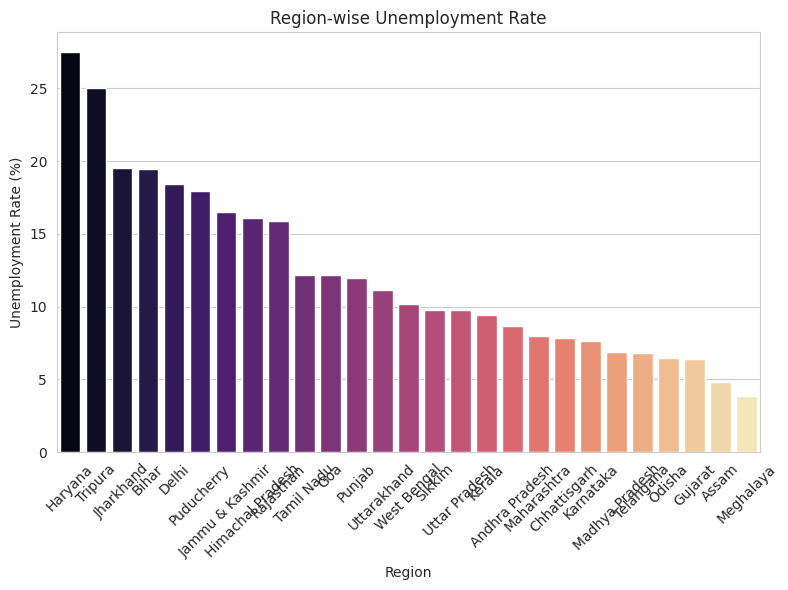

In [48]:
# 2. Region-wise Unemployment Rate
region_unemployment = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_unemployment.index, y=region_unemployment.values, palette='magma')
plt.title('Region-wise Unemployment Rate')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-49-8878939d8619>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




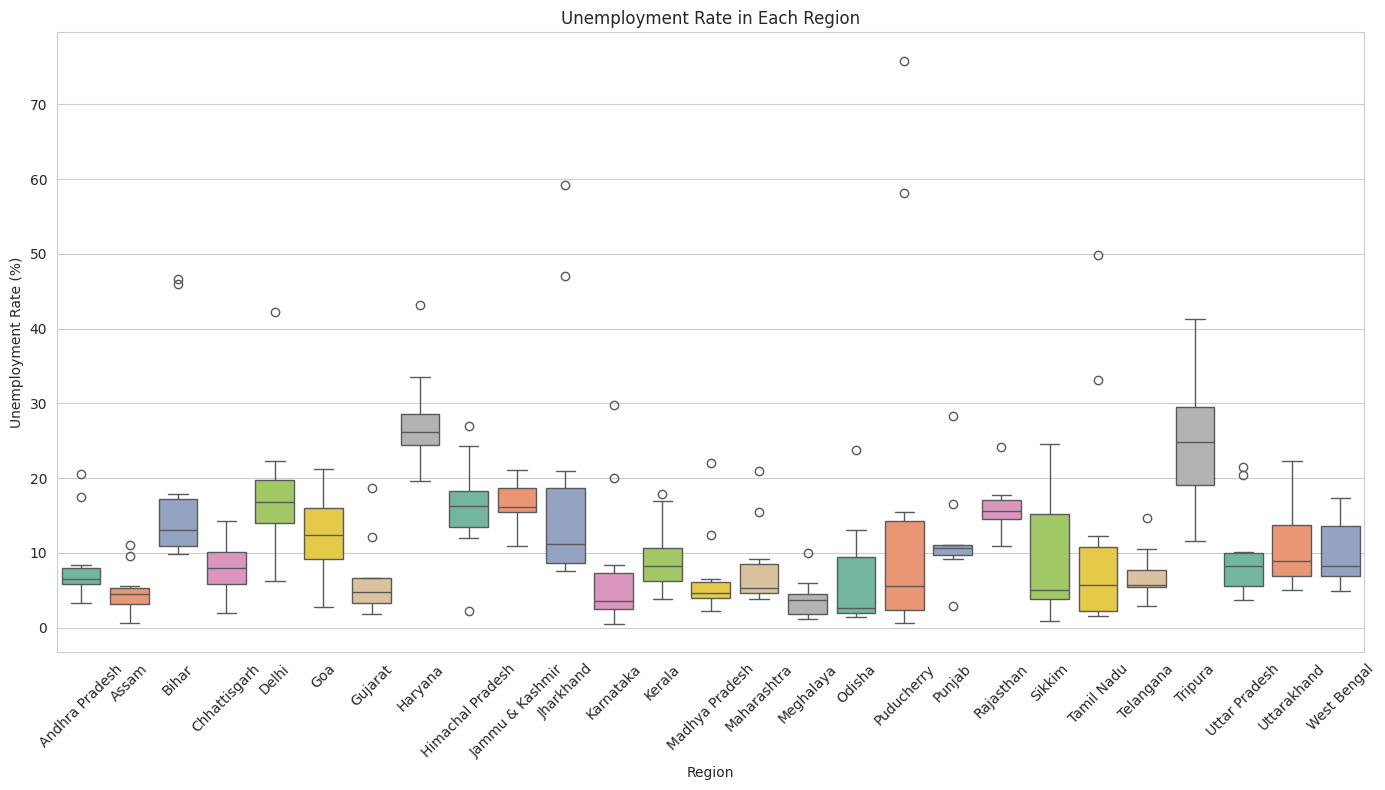

In [49]:
# 3. Unemployment Rate in Each Region and State
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')
plt.title('Unemployment Rate in Each Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

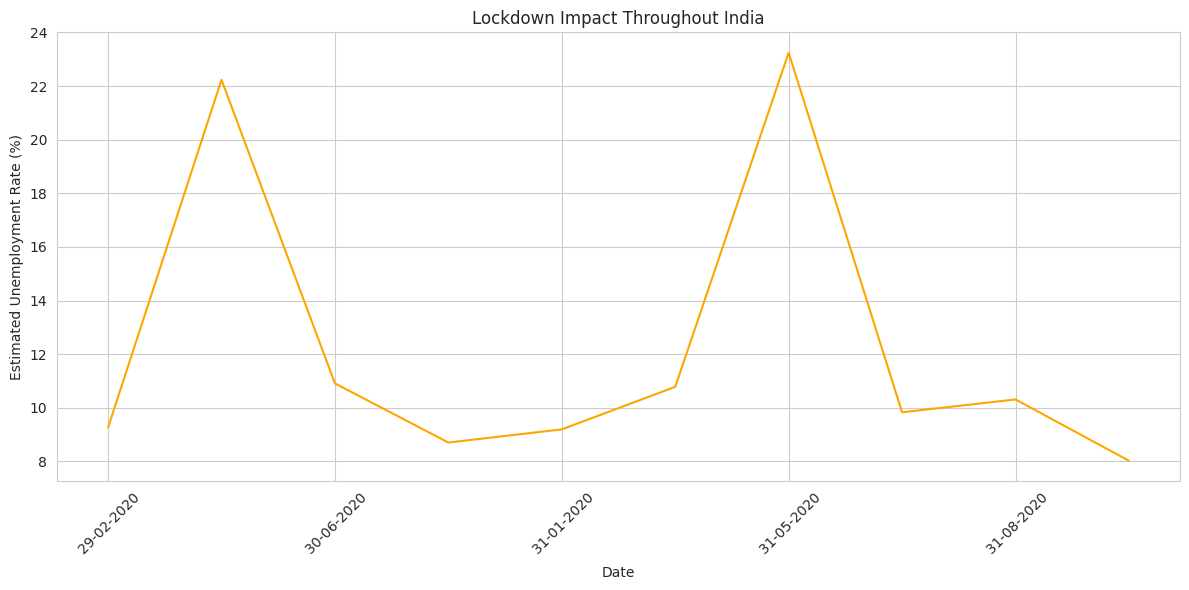

In [50]:
# 4. Lockdown Impact Throughout India
lockdown_impact = data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(12, 6))
lockdown_impact.plot(color='orange')
plt.title('Lockdown Impact Throughout India')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

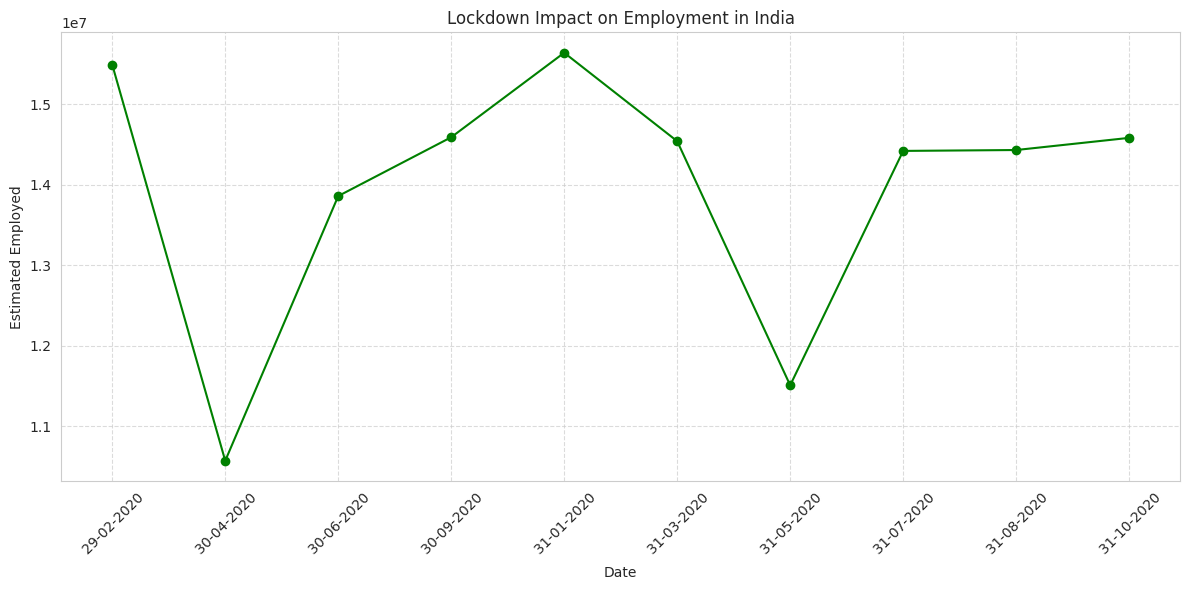

In [52]:
# 5. Lockdown Impact on Employment in India
lockdown_employment_impact = data.groupby('Date')['Estimated Employed'].mean()
plt.figure(figsize=(12, 6))
plt.plot(lockdown_employment_impact.index, lockdown_employment_impact.values, marker='o', color='green', linestyle='-')
plt.title('Lockdown Impact on Employment in India')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()